In [2]:
import numpy as np

lista = []
for i in range(169):
    X = np.load('../../../data/test_data/X_'+str(i)+'.npy')
    lista.append(np.amax(abs(X)))

from models import *

lista_2 = []

model = get_model()
for layer in model.layers:    
    # Input, Maxpool and Softmax layers do not contain weights
    if 'input' in layer.name or 'maxpool' in layer.name or 'softmax' in layer.name or layer.name == 'dec_0_upsample' or layer.name == 'dec_1_upsample' or layer.name == 'dec_2_upsample' or layer.name == 'dec_3_upsample' or 'concatenate' in layer.name :
        pass
    else:
        array = np.load('../../../data/weights/'+layer.name + '.npy')
        lista_2.append(np.amax(np.abs(array)))

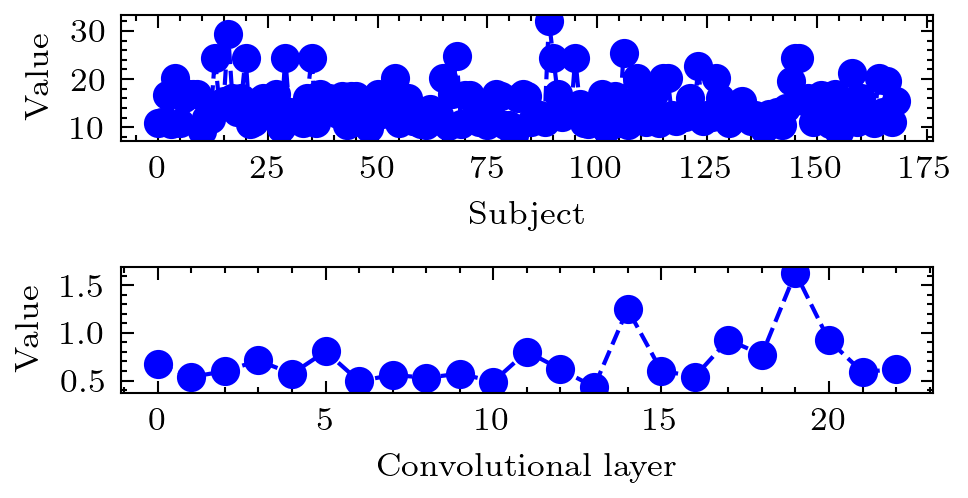

In [3]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])

fig, axs = plt.subplots(2,1)
#set fig height
fig.set_figheight(1.8)
axs[0].plot(lista, c='blue', marker='o', linestyle='dashed')   
#ax.grid(color='r', linestyle='-', linewidth=0.2)
#axs[0].set_title('Max abs. value of the input data')
axs[0].set_xlabel('Subject')
axs[0].set_ylabel('Value')
#axs[0].set_xticks([])
axs[1].plot(lista_2, c='blue', marker='o', linestyle='dashed')   
#ax[1].grid(color='r', linestyle='-', linewidth=0.2)
#axs[1].set_title('Max abs. value of the weights')
axs[1].set_xlabel('Convolutional layer')
axs[1].set_ylabel('Value')
#plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
plt.gcf().set_dpi(300)
plt.savefig("quant_val_max.svg", format="svg")
plt.show()



In [1]:
#DATA LOAD
#change with your path containing results from python and from the quantized net
fc = open("output_quantized.txt","r")
fp = open("python_res_total.txt","r")

avg_err = [[], [], [], []]
max_err = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250))

    max_err[0].append(max(ch[0]))
    max_err[1].append(max(ch[1]))
    max_err[2].append(max(ch[2]))
    max_err[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

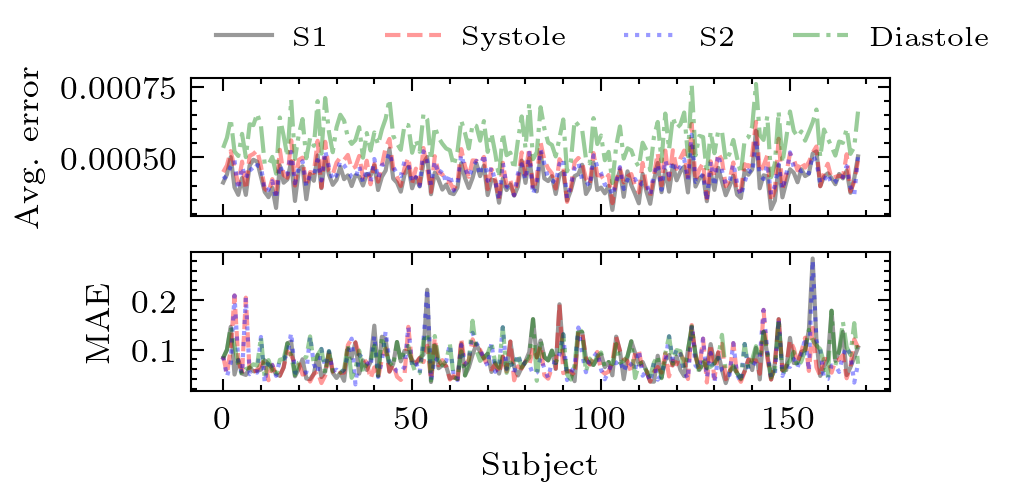

In [5]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee'])

labels = ['S1','Systole',"S2","Diastole"]

fig, axs = plt.subplots(2, 1)
#set fig height
fig.set_figheight(1.8)
#axs[0].set_title(f'Avg. error measured for the quantized CNN')
for i in range(4):
    axs[0].plot(avg_err[i], alpha=0.4, label=labels[i])
    axs[1].plot(max_err[i], alpha=0.4, label=labels[i])
#axs[0].set_xlabel(f'Subject\n\n(a) Avg. error measured for the quantized CNN')
axs[0].set_ylabel('Avg. error')
#axs[0].set_xticks([])
#axs[0].legend(fontsize='xx-small', loc='upper left',ncols=4)
#axs[1].set_title(f'Max error measured for the quantized CNN')
axs[1].set_xlabel('Subject')
axs[1].set_ylabel('MAE')
#axs[1].legend(fontsize='xx-small', loc='upper left', ncols=4)
axs[0].legend(bbox_to_anchor=(0,1.02, 1,0.2), fontsize='small', ncols=4)
#axs[1].legend(bbox_to_anchor=(1, 1.1), fontsize='x-small')
#fig.suptitle('Max error in each patient', fontsize=16)

#add subtitle to subplot under its x axis
#axs[0].text(0.5, -0.2, 'Subject', ha='center', va='center', transform=axs[0].transAxes)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.tight_layout()
plt.gcf().set_dpi(300)
plt.savefig("quant_error.svg", format="svg")
plt.show()

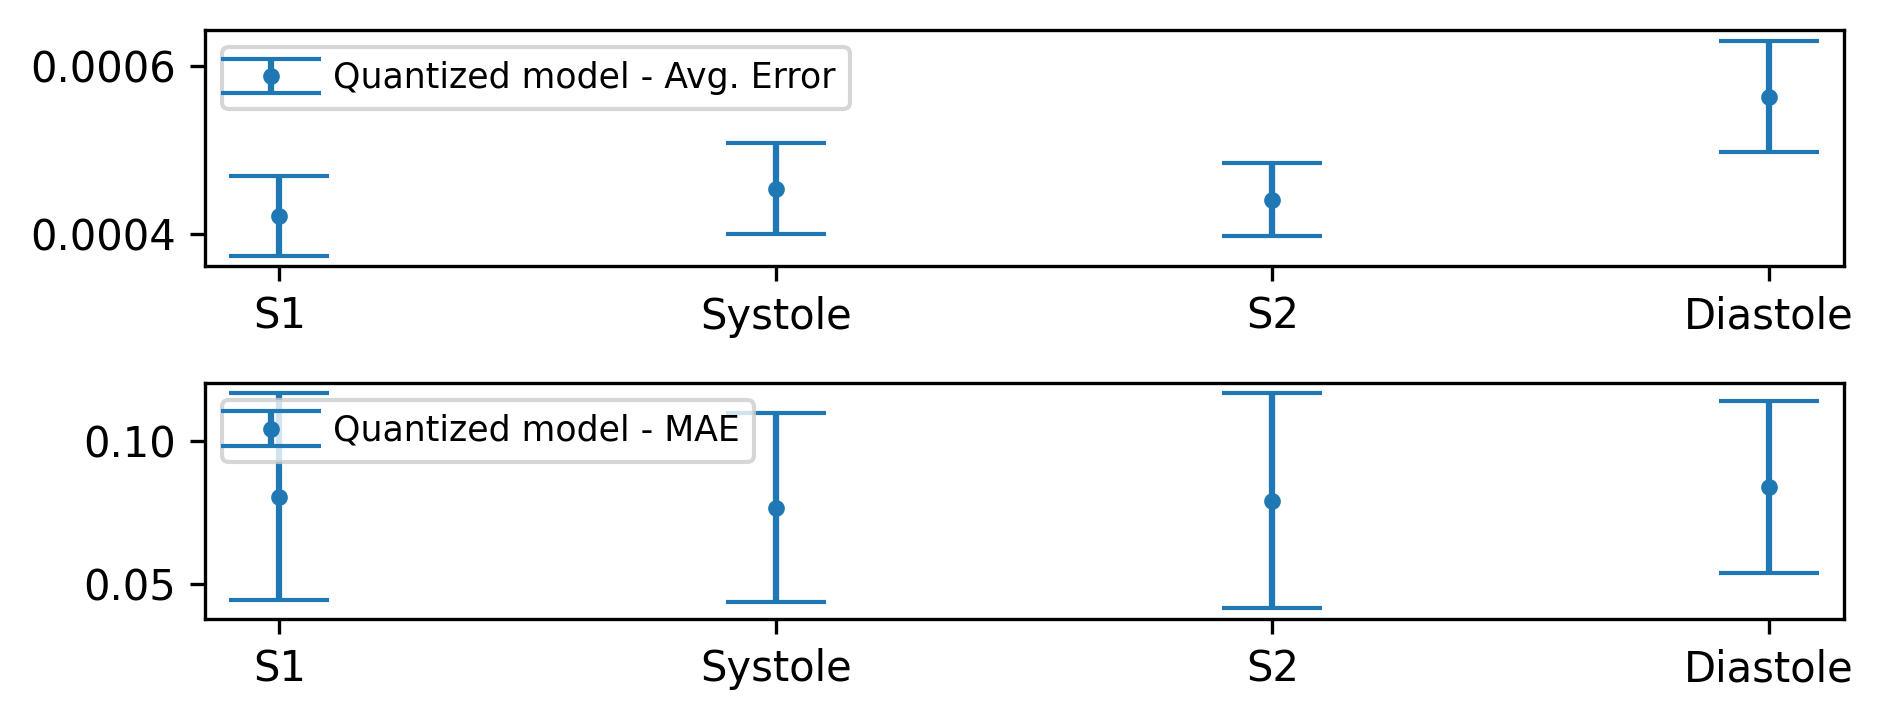

In [6]:
import numpy
import matplotlib.pyplot as plt

y_avg = []
e_avg =[]
x = ["S1", "Systole", "S2", "Diastole"]

for i in range(4):
    y_avg.append(numpy.mean(avg_err[i]))
    e_avg.append(numpy.std(avg_err[i]))

fig, axs = plt.subplots(2, 1)
fig.set_figheight(2.5)

axs[0].errorbar(x, y_avg, e_avg, linestyle='None', capsize=12, marker='.')
axs[0].legend(["Quantized model - Avg. Error"], fontsize='small', loc='upper left')
y_err = []
e_err =[]
x = ["S1", "Systole", "S2", "Diastole"]

for i in range(4):
    y_err.append(numpy.mean(max_err[i]))
    e_err.append(numpy.std(max_err[i]))

axs[1].errorbar(x, y_err, e_err, linestyle='None', capsize=12, marker='.')
axs[1].legend(["Quantized model - MAE"], fontsize='small', loc='upper left')
plt.tight_layout()
plt.gcf().set_dpi(300)
plt.savefig("error_mean_std_avg_mae_quant.svg", format="svg")
plt.show()

In [7]:
import numpy as np
labels = ['S1','Systole',"S2","Diastole"]

#Print mean and std. dev of the avg error
print("Mean and std. dev of the avg error")
for i in range(4):
    print(labels[i])
    print("Mean: ", np.mean(avg_err[i]))
    print("Std. dev: ", np.std(avg_err[i]))
print("")

#print mean and std. dev of the max error
print("Mean and std. dev of the max error")
for i in range(4):
    print(labels[i])
    print("Mean: ", np.mean(max_err[i]))
    print("Std. dev: ", np.std(max_err[i]))


Mean and std. dev of the avg error
S1
Mean:  0.00042185647615210827
Std. dev:  4.712244792206978e-05
Systole
Mean:  0.0004541433651757769
Std. dev:  5.433626455896186e-05
S2
Mean:  0.0004409863147120936
Std. dev:  4.341269959798964e-05
Diastole
Mean:  0.0005632786142446377
Std. dev:  6.621001759104537e-05

Mean and std. dev of the max error
S1
Mean:  0.08050228626627219
Std. dev:  0.03600076657818793
Systole
Mean:  0.07669723572662722
Std. dev:  0.032924904370220685
S2
Mean:  0.07910841649408283
Std. dev:  0.0373496265755597
Diastole
Mean:  0.08395796276390531
Std. dev:  0.02997708825620527
